# Table of Contents
## 1 Import Libraries
## 2 Import data set 
## 3 Relationshps to explore
    Hypothesis
### 4 Cleaning data 
    Missing values, duplicate check, extreme values check 
### 5 Prepare data for regression analysis
    - Scatterplot 
    - Independent and dependent variables 
    - Split the data 
### 6 Regression Analysis     
    - Fit the model to the training set 
    - Create a prediction for y on the test set 
    - Create a plot that shows the regression line on the test set 
    - Model performance statistics 
    - Compare the predicted y values with the actual y values 

# 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# 2 Import Times data set

In [2]:
#Path 
path = r'C:\Users\ctede\OneDrive\Desktop\World University Rankings Analysis'

#Times data set
Times = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','Times_new_cols.pkl'))

In [3]:
Times.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year,Median_Score,Score_Category,region
0,1,Harvard University,United States of America,99.7,72,98.7,98.8,34,96,20152,8.9,25,NaN,2011,98.70,Over 80,North America
1,2,California Institute of Technology,United States of America,97.7,54,98.0,99.9,83,96,2243,6.9,27,33 : 67,2011,97.70,Over 80,North America
2,3,Massachusetts Institute of Technology,United States of America,97.8,82,91.4,99.9,87,95,11074,9.0,33,37 : 63,2011,91.40,Over 80,North America
3,4,Stanford University,United States of America,98.3,29,98.1,99.2,64,94,15596,7.8,22,42:58:00,2011,98.10,Over 80,North America
4,5,Princeton University,United States of America,90.9,70,95.4,99.9,<NA>,94,7929,8.4,27,45:55:00,2011,93.15,Over 80,North America


In [4]:
Times.shape

(2603, 17)

# 3 Relationships to Explore

The median score was a column created in Excel that took the median of the five indicators (teaching, international, research, citations, and income). The median score is supposed to act as a supplemental score to the total score because the total score has a significant amount of missing values and cannot be used to accurately display information. Similarly, the world rank has a lot of data with dashes or missing (due to the total score missing too). 

Based on the previous scatterplots, I will be exploring the following relationships: 

- median score vs research --> there was a positive linear relationship 
    - The research variable refers to the volume, income, and reputation (reputation survey, research income, and research productivity (with a heavy emphasis on the research survey)). 
    
- median score vs teaching --> also a positive linear relationship 
    - The teaching variable refers to the learning environment (reputation survey, staff-to-student ratio, doctorate-to-bachelor's ratio, doctorates-awarded-to-academic-staff ratio, and institutional income). 
    
- median score vs citations --> positive relationship (not linear)
    - The citatons variable refers to the research influence (university's role in spreading new knowledge and ideas) 
        - i.e. the average number of times a university's published work is cited by scholars globally 
        
Each of these variables (research, teching, and citations) is weighted 30% towards the overall ranking. And each of the reputation surveys within these variables has a 15% weight.         

## Hypothesis 
The better the learning environment, the higher ranked the university will be. In other words, if the teaching score is high for a university, that university will be ranked higher globally. 

The higher the research score, the higher ranked the university will be. 

# 4 Cleaning data 

### Missing values and duplicates check 

In [5]:
#create a subset of variables of interest: world_rank, median_score, research, teaching, citations 
columns = ["world_rank", "Median_Score", "research", "teaching", "citations"]

In [6]:
times_sub = Times[columns]

In [7]:
times_sub.head()

,world_rank,Median_Score,research,teaching,citations
0,1,98.70,98.7,99.7,98.8
1,2,97.70,98.0,97.7,99.9
2,3,91.40,91.4,97.8,99.9
3,4,98.10,98.1,98.3,99.2
4,5,93.15,95.4,90.9,99.9


In [8]:
times_sub.shape

(2603, 5)

In [9]:
#Check for missing values 
times_sub.isnull().sum()

world_rank      0
Median_Score    0
research        0
teaching        0
citations       0
dtype: int64

In [10]:
#Check for duplicate values
dups = times_sub.duplicated()
dups.shape

(2603,)

### Extreme values check

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Median_Score', ylabel='Density'>

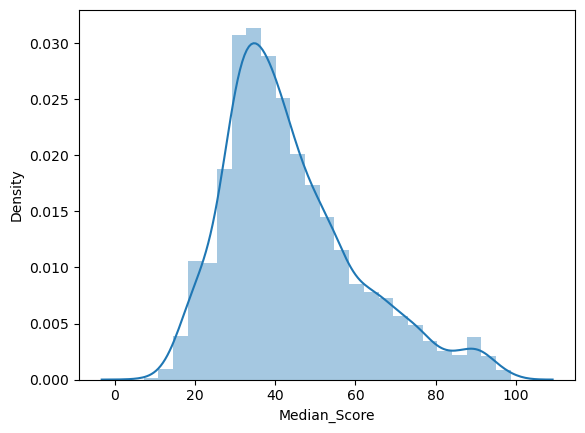

In [11]:
#Median Score
sns.distplot(times_sub['Median_Score'], bins=25)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='research', ylabel='Density'>

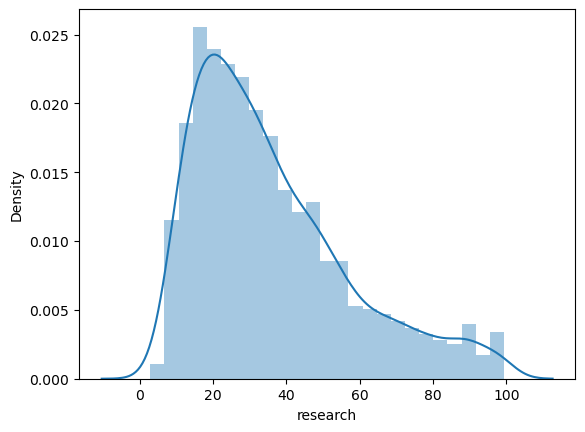

In [12]:
#Research 
sns.distplot(times_sub['research'], bins=25)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='teaching', ylabel='Density'>

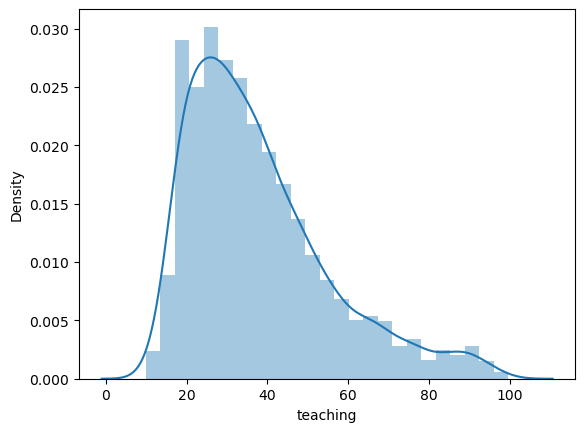

In [13]:
#teaching 
sns.distplot(times_sub['teaching'], bins=25)

C:\apps\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='citations', ylabel='Density'>

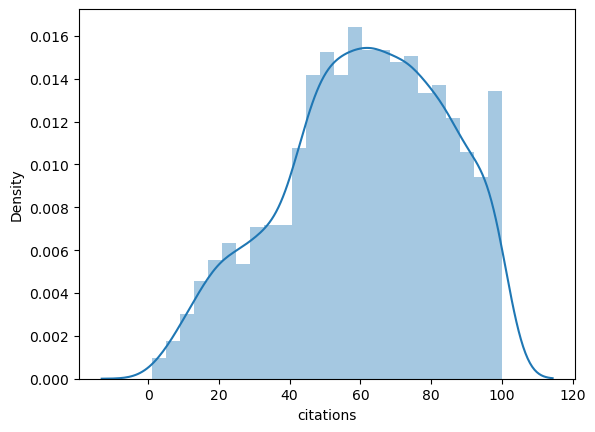

In [14]:
#citations
sns.distplot(times_sub['citations'], bins=25)

In general, there don't seem to be extreme or outlier values in any of the variables of interest. The density plot for the citations variable is different from the others. It is left skewed and has a wider center or peak. 

# 5 Prepare data for regression analysis 

### Scatterplots

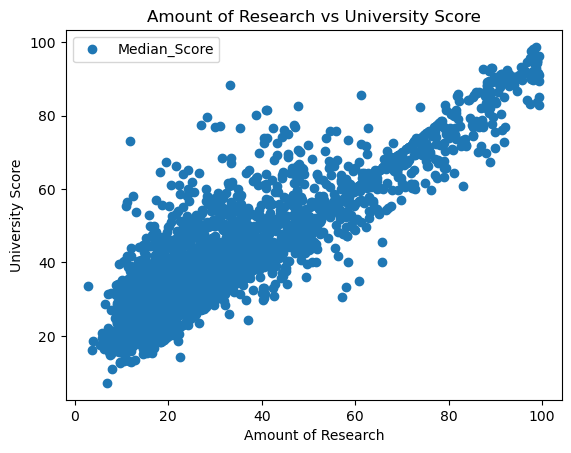

In [15]:
#Use matplotlib to create the scatterplots
times_sub.plot(x='research',y='Median_Score', style='o')
plt.title('Amount of Research vs University Score')
plt.xlabel('Amount of Research')
plt.ylabel('University Score')
plt.show()

There is a positive linear relationship between the median university score and the research variable. A lot of the data appears condensed between a median score of 60 and research score of 60. There do not seem to be a lot of outliers. 

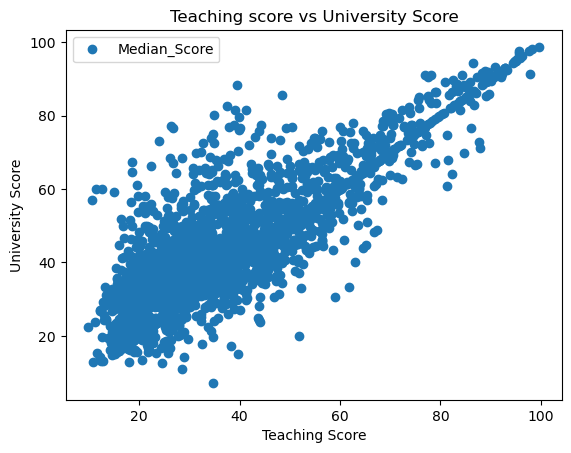

In [16]:
#Use matplotlib to create the scatterplots
times_sub.plot(x='teaching',y='Median_Score', style='o')
plt.title('Teaching score vs University Score')
plt.xlabel('Teaching Score')
plt.ylabel('University Score')
plt.show()

Similar to the research scatterplot, there is a positive relationship between the university median score and the teaching variable/score. 

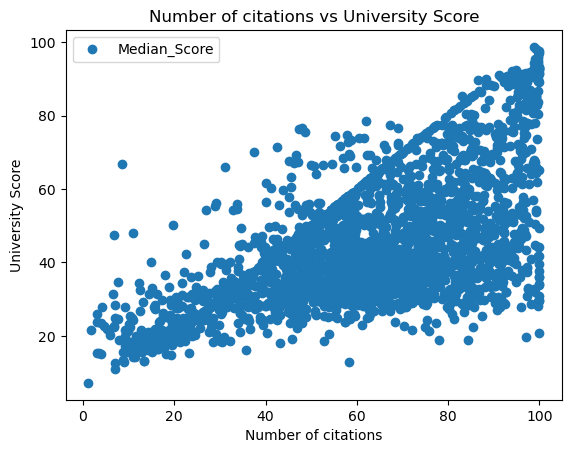

In [17]:
#Use matplotlib to create the scatterplots
times_sub.plot(x='citations',y='Median_Score', style='o')
plt.title('Number of citations vs University Score')
plt.xlabel('Number of citations')
plt.ylabel('University Score')
plt.show()

This scatterplot has a small upward/positive trend, however, I am not sure I would classify this as linear because of how spread out the data points are. The upward trend is also not as prominent. 

### Prepare the independent and dependent variables 

In [19]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = times_sub['research'].values.reshape(-1,1)

#y = dependent 
y = times_sub['Median_Score'].values.reshape(-1,1)

In [20]:
#Check X
X

array([[98.7],
       [98. ],
       [91.4],
       ...,
       [10.2],
       [16. ],
       [18.3]])

In [21]:
#Check y 
y

array([[98.7],
       [97.7],
       [91.4],
       ...,
       [24. ],
       [20.1],
       [18.3]])

### Split the data into a training set and test set 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

# 6 Regression Analysis 

In [23]:
#Create a regression object 
regression = LinearRegression()

### Fit the model to the training set 

In [24]:
regression.fit(X_train, y_train)

LinearRegression()

### Create a prediction for y on the test set 

In [25]:
y_predicted = regression.predict(X_test)

### Create a plot that shows the regression line on the test set 

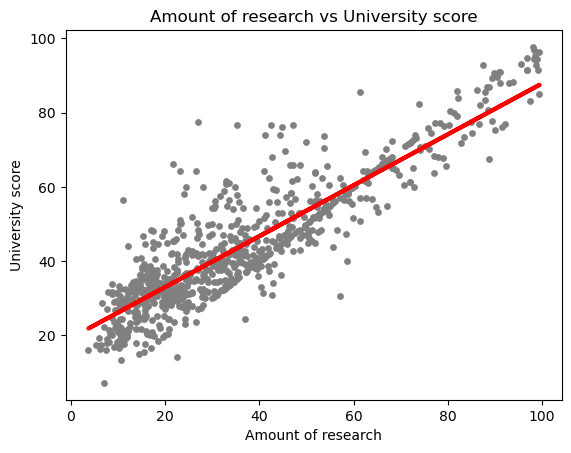

In [26]:
plot_test = plt 
plot_test.scatter(X_test, y_test, color = 'gray', s=15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth=3)
plot_test.title('Amount of research vs University score')
plot_test.ylabel('University score')
plot_test.xlabel('Amount of research')
plot_test.show()

### Write your own interpretation of how well the line appears to fit the data in a markdown cell. 

The data follows a general positive, upward trend. The data points do not fit tight or closely to the regression line. 

### Model performance statistics 

In [27]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [28]:
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.68548726]]
Mean squared error 62.313923493302646
R2 score 0.796724243316429


In [29]:
times_sub.describe()

,Median_Score,research,teaching,citations
count,2603.000000,2603.000000,2603.000000,2603.000000
mean,43.918748,35.910257,37.801498,60.921629
std,16.788621,21.254805,17.604218,23.073219
min,7.200000,2.900000,9.900000,1.200000
25%,32.000000,19.600000,24.700000,45.500000
50%,40.200000,30.500000,33.900000,62.500000
75%,52.850000,47.250000,46.400000,79.050000
max,98.700000,99.400000,99.700000,100.000000


Slope = 0.685
- indicates a positive relationship 
- As the research score increases, the university's median score will also increase

MSE = 62
- The mean squared error value is relatively high and indicates that the data points are far from the regression line. 
- The lower the MSE, the better the forecast.

R2 = 0.796 or ~80%
- This R2 is closer to 1, indicating that the regression line is a good fit 
- About 80% of the variance in the university's median score can be explained by the number of published articles 

# Repeat the regression for other variables

In [30]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = times_sub['teaching'].values.reshape(-1,1)

#y = dependent 
y = times_sub['Median_Score'].values.reshape(-1,1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [32]:
#Create a regression object 
regression = LinearRegression()

In [33]:
regression.fit(X_train, y_train)

LinearRegression()

In [34]:
y_predicted = regression.predict(X_test)

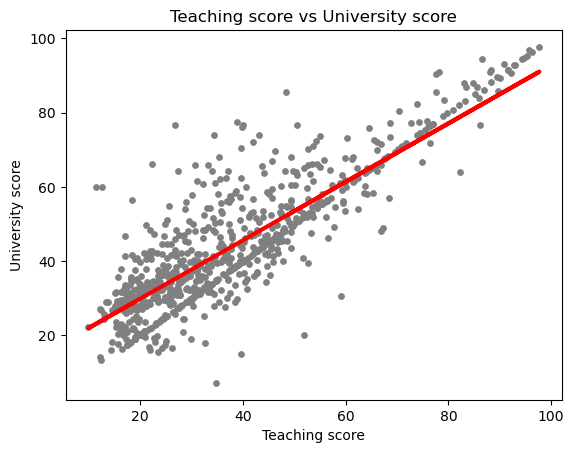

In [35]:
plot_test = plt 
plot_test.scatter(X_test, y_test, color = 'gray', s=15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth=3)
plot_test.title('Teaching score vs University score')
plot_test.ylabel('University score')
plot_test.xlabel('Teaching score')
plot_test.show()

In [36]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [37]:
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.7867338]]
Mean squared error 82.8924460290709
R2 score 0.7295945473290177


Slope = 0.786
- indicates a positive linear relationship btwn the university median score and the teaching variable 
- As the teaching score increases, so does the university score

MSE = 82.89
- The MSE is high/large, which indicates that there is a large distance between the regression line and the data points 

R2 = 0.729 or ~73%
- The R2 score is closer to 1, which indicates that the regression line is a good fit for this data. 

Overall, the research variable has a better linear relationship than the teach variable with the median score. 

In [38]:
#Reshape the variables into NumPy arrays and place them into separate objects 
#X = independent 
X = times_sub['citations'].values.reshape(-1,1)

#y = dependent 
y = times_sub['Median_Score'].values.reshape(-1,1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [40]:
#Create a regression object 
regression = LinearRegression()

In [41]:
regression.fit(X_train, y_train)

LinearRegression()

In [42]:
y_predicted = regression.predict(X_test)

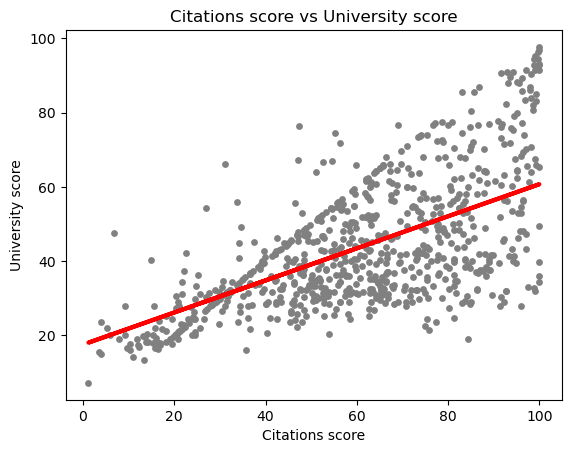

In [43]:
plot_test = plt 
plot_test.scatter(X_test, y_test, color = 'gray', s=15)
plot_test.plot(X_test, y_predicted, color = 'red', linewidth=3)
plot_test.title('Citations score vs University score')
plot_test.ylabel('University score')
plot_test.xlabel('Citations score')
plot_test.show()

In [44]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [45]:
print('Slope', regression.coef_)
print('Mean squared error', rmse)
print('R2 score', r2)

Slope [[0.43196384]]
Mean squared error 181.44973609829174
R2 score 0.408088428112238


Of all the variables that I did a regression analysis on, the citation variable has the worst regression results. Meaning the citations variable does not impact the median score of a university as significantly as other variables. 

Slope = 0.43
- Indicates a positive relationship between the median score and the citations score 

MSE = 181
- This MSE is extremely large and significanlty different than the other variables (research and teaching)
- The distance between the regression line and the data points is very large 

R2 = 0.408 or ~41%
- The R2 score is closer to 0 than to 1, thus the regression line is not a good fit for this data. 